# Настройка pandas

In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

# задаем стартовое значение для генератора
# случайных чисел
seedval = 111111

# Создание графиков временных рядов 

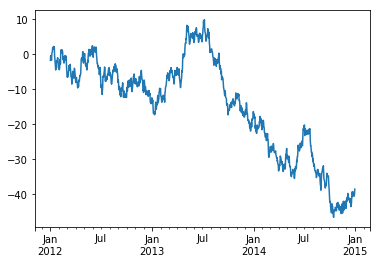

In [2]:
# генерируем временной ряд на
# основе случайного блуждания
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
walk_ts = s.cumsum()
# эта строка визуализирует случайное блуждание - так просто :)
walk_ts.plot();

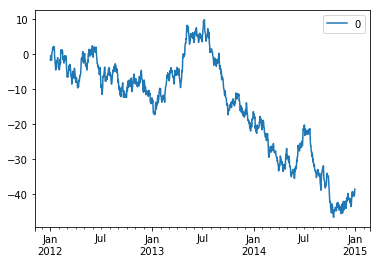

In [3]:
# Визуализация объекта DataFrame с одним столбцом даст 
# аналогичный результат, что и визуализация объекта Series,
# только теперь будет еще добавлена легенда
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [4]:
# сгенерируем два случайных блуждания, которые станут 
# двумя столбцами объекта DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

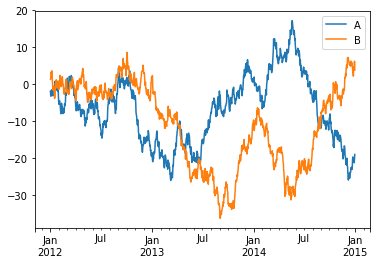

In [5]:
# визуализируем данные датафрейма, на графике каждый
# столбец будет представлен линией, а также будет
# добавлена легенда
walk_df.plot();

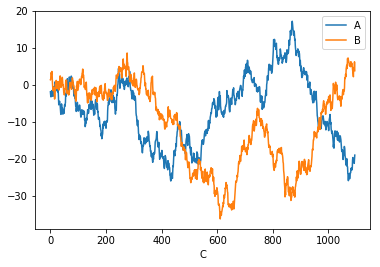

In [6]:
# создаем копию случайного блуждания
df2 = walk_df.copy()
# добавляем столбец C, который принимает
# значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# в качестве меток оси X вместо дат используем 
# значения столбца 'C', получаем метки оси x в
# диапазоне от 0 до 1000
df2.plot(x='C', y=['A', 'B']);

# Добавление заголовка и изменение подписей осей

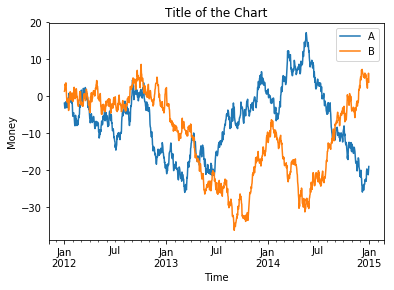

In [7]:
# создаем график временного ряда с заголовком и заданными 
# подписями осей x и y

# заголовок задаем с помощью параметра title метода .plot()
walk_df.plot(title='Title of the Chart')
# после вызова метода .plot() явно
# задаем подписи осей x и y
plt.xlabel('Time')
plt.ylabel('Money');

# Настройка содержимого легенды и ее расположения

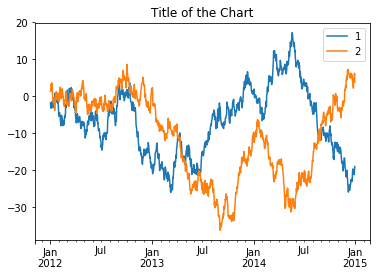

In [8]:
# изменяем элементы легенды, соответствующие 
# именам столбцов датафрейма
ax = walk_df.plot(title='Title of the Chart')
# эта строка задает метки легенды
ax.legend(['1', '2']);

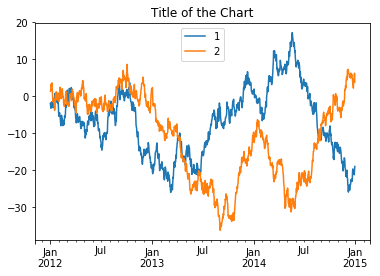

In [9]:
# изменяем расположение легенды
ax = walk_df.plot(title='Title of the Chart')
# применяем к легенде вертикальное выравнивание сверху 
# с горизонтальным выравниванием по центру
ax.legend(['1', '2'], loc='upper center');

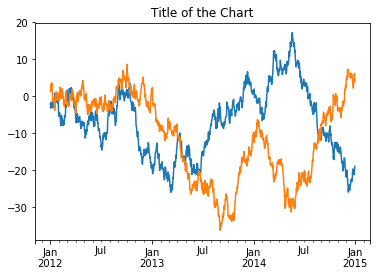

In [10]:
# отключаем легенду с помощью legend=False
walk_df.plot(title='Title of the Chart', legend=False);

# Настройка цветов, стилей, толщины и маркеров линий

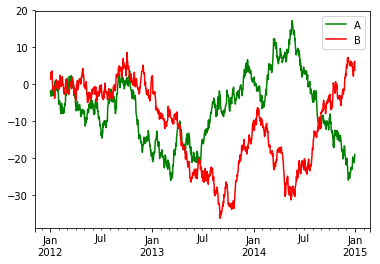

In [11]:
# меняем цвета линий графика, используя символьный
# код для первой линии и шестнадцатеричный
# RGB-код для второй
walk_df.plot(style=['g', '#FF0000']);

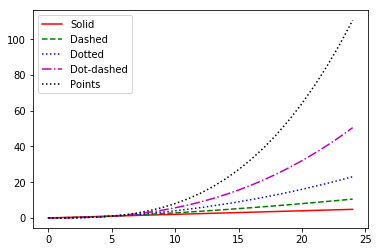

In [12]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# создаем график, задав цвет и стиль каждой линии
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# задаем легенду
ax.legend(legend_labels, loc='upper left');

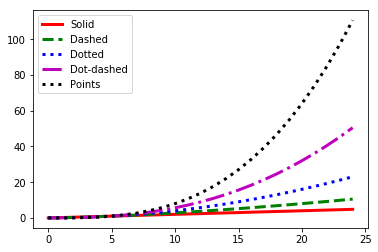

In [13]:
# заново строим график, задав стиль и цвет каждой
# линии и толщину 3 для всех линий 
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

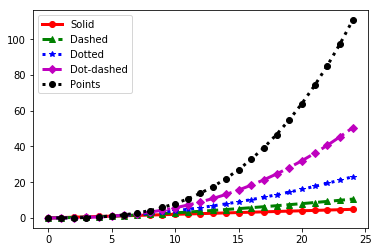

In [14]:
# рисуем заново, добавив маркеры линий
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

# Настройка цены делений и меток делений шкалы

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

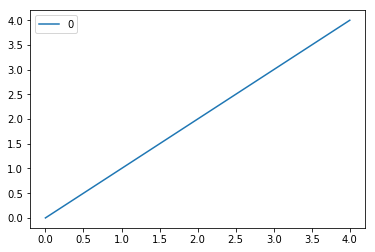

In [15]:
# строим простой график, чтобы продемонстрировать,
# как извлечь информацию о делениях шкалы
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

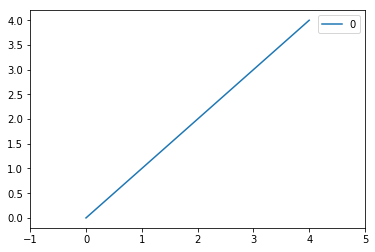

In [16]:
# заново задаем диапазон оси x от -1 от 5 и выводим
# деления только для целочисленных значений
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

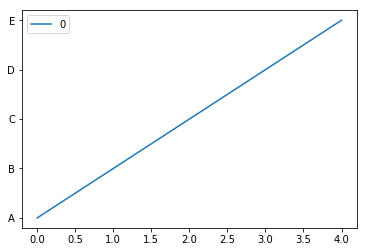

In [17]:
# переименовываем метки делений оси y
# в метки A, B, C, D и E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

# Форматирование меток делений, содержащих даты, с помощью форматтеров

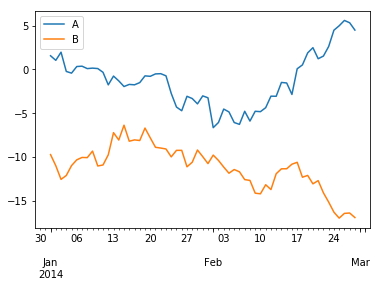

In [18]:
# визуализируем данные за январь-февраль 2014
# на основе случайного блуждания
walk_df.loc['2014-01':'2014-02'].plot();

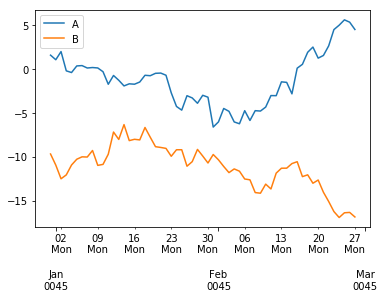

In [19]:
# импортируем необходимые локаторы и форматтеры
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# визуализируем данные за январь-февраль 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

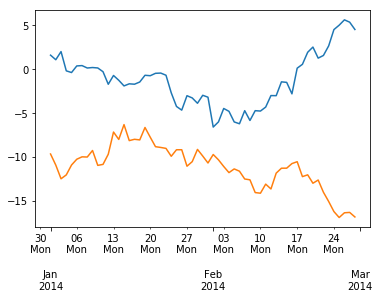

In [20]:
# создаем копию данных за январь-февраль 2014
walk_subset = walk_df['2014-01':'2014-02']

# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

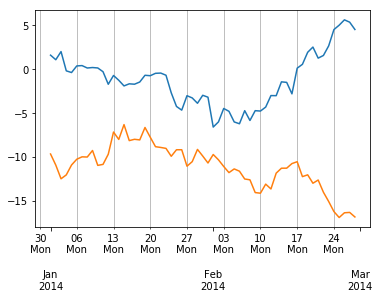

In [21]:
# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # включаем линии сетки для промежуточных делений
ax.xaxis.grid(False, "major") # отключаем линии сетки для основных делений

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

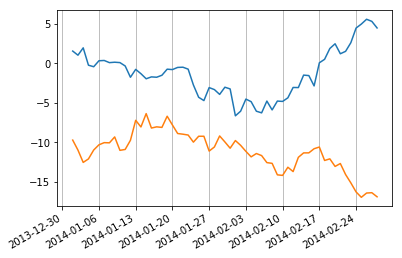

In [22]:
# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # выводим линии сетки для основных делений

# настраиваем метки основных делений
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# выполняем поворот меток с датами
fig.autofmt_xdate();

# Столбиковые диаграммы

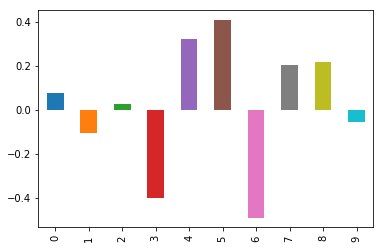

In [23]:
# сгенерируем данные для столбиковой диаграммы
# сгенерируем небольшую серию, состоящую 
# из 10 случайных значений
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# строим столбиковую диаграмму
s.plot(kind='bar');

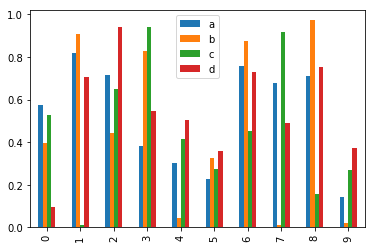

In [24]:
# сгенерируем данные для столбиковой диаграммы 
# на основе нескольких серий
# сгенерируем 4 столбца, состоящих
# из 10 случайных значений
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# строим столбиковую диаграмму 
# на основе нескольких серий
df2.plot(kind='bar');

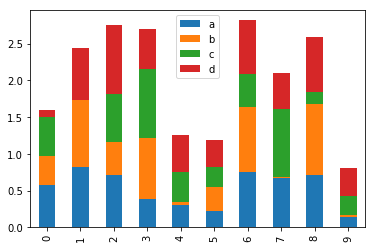

In [25]:
# вертикальная состыкованная
# столбиковая диаграмма
df2.plot(kind='bar', stacked=True);

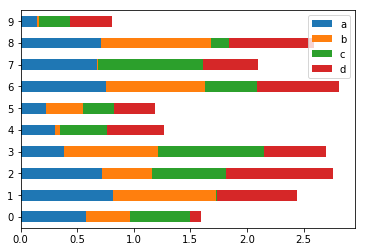

In [26]:
# горизонтальная состыкованная
# столбиковая диаграмма
df2.plot(kind='barh', stacked=True);

# Гистограммы

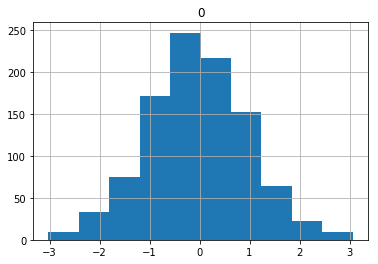

In [27]:
# сгенерируем данные для гистограммы
np.random.seed(seedval)
# генерируем 1000 случайных чисел
dfh = pd.DataFrame(np.random.randn(1000))
# строим гистограмму
dfh.hist();

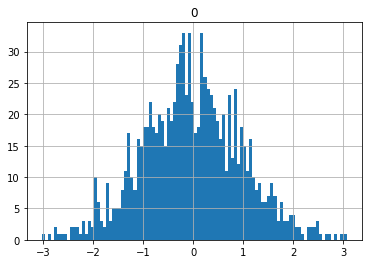

In [28]:
# снова строим гистограмму, но теперь с 
# большим количеством интервалов (бинов)
dfh.hist(bins = 100);

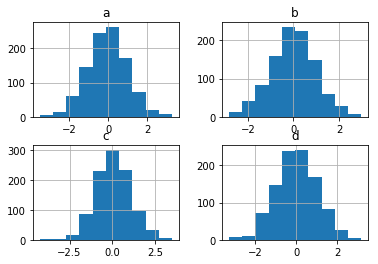

In [29]:
# сгенерируем данные для графика с
# несколькими гистограммами
# создаем датафрейм с 4 столбцами,
# каждый состоит из 1000 случайных чисел
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), 
                   columns=['a', 'b', 'c', 'd'])
# строим график. Поскольку у нас 4 столбца,
# pandas строит четыре гистограммы
dfh.hist();

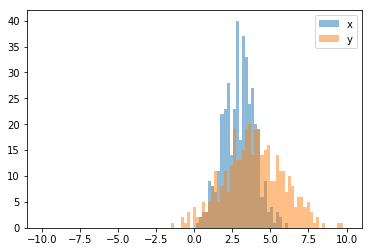

In [30]:
# напрямую воспользуемся модулем pyplot 
# для наложения нескольких гистограмм
# сгенерируем два распределения, каждое со своим
# средним значением и стандартным отклонением
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# задаем интервалы (диапазон от -10 до 10 и 100 интервалов)
bins = np.linspace(-10, 10, 100)

# строим график x с помощью plt.hist, 50% прозрачности
plt.hist(x, bins, alpha=0.5, label='x')
# строим график y с помощью plt.hist, 50% прозрачности
plt.hist(y, bins, alpha=0.5, label='y')
# размещаем легенду в верхнем правом углу
plt.legend(loc='upper right');

# Ящичные диаграммы с усами

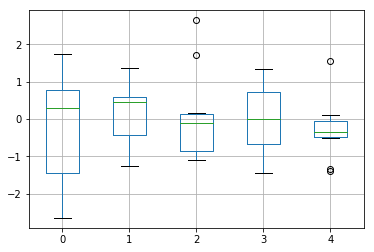

In [31]:
# сгенерируем данные для ящичной диаграммы
# сгенерируем серию
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# строим график
dfb.boxplot(return_type='axes');

# Площадные диаграммы

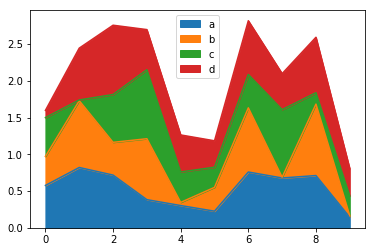

In [32]:
# сгенерируем данные для состыкованной
# площадной диаграммы
# создадим датафрейм из 4 столбцов,
# используя случайные числа
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# создаем площадную диаграмму
dfa.plot(kind='area');

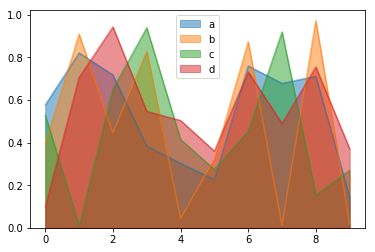

In [33]:
# строим несостыкованную площадную диаграмму
dfa.plot(kind='area', stacked=False);

# Диаграммы рассеяния

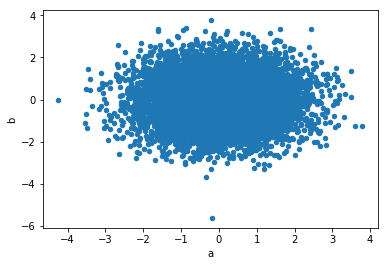

In [34]:
# создаем диаграмму рассеяния, состоящую из двух серий
# нормально распределенных случайных чисел
# мы ожидаем получить кластер с координатами центра 0,0
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2), 
                     columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b');

# График ядерной оценки плотности

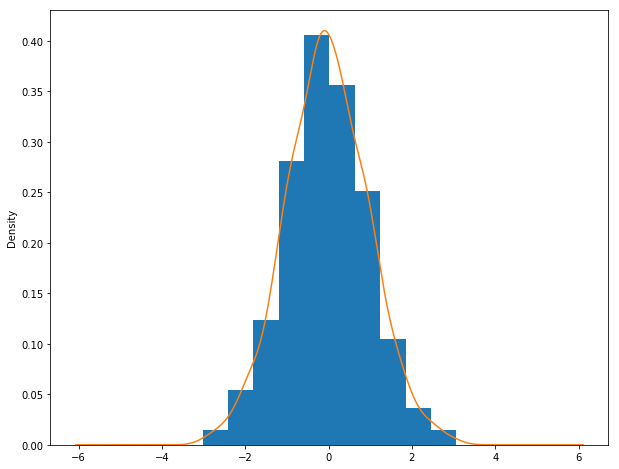

In [35]:
# создаем данные для графика ядерной
# оценки плотности
# сгенерируем серию из 1000 случайных чисел
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# строим график
s.hist(density=True) # выводим столбики
s.plot(kind='kde', figsize=(10,8));

# Матрица диаграмм рассеяния

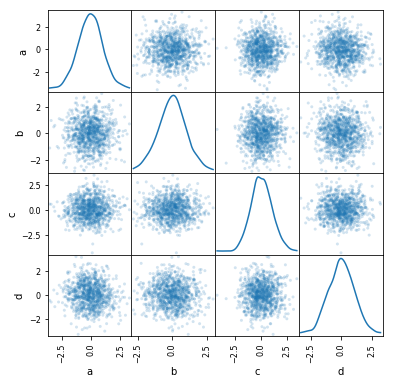

In [36]:
# создаем данные для матрицы
# диаграмм рассеяния
# импортируем класс scatter_matrix
from pandas.plotting import scatter_matrix

# создаем датафрейм с 4 столбцами,
# каждый состоит из 1000 случайных чисел
np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(1000, 4), 
                      columns=['a', 'b', 'c', 'd'])
# строим матрицу диаграмм рассеяния
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde');

# Тепловая карта

In [37]:
# создаем данные для теплокарты
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

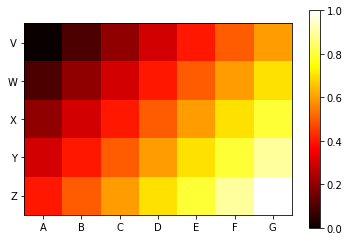

In [38]:
# строим теплокарту
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # добавим шкалу интенсивности цвета
# задаем метки
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

# Размещение нескольких графиков на одном рисунке

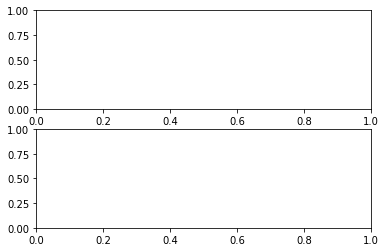

In [39]:
# создаем два подграфика на одном рисунке,
# используя сетку 2x1 (2 строки и 1 столбец)
# ax1 - верхняя строка
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# и ax2 - нижняя строка
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

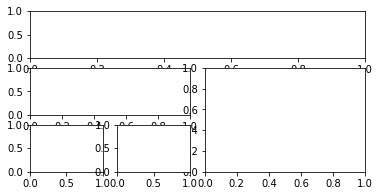

In [40]:
# создаем макет с подграфиками, используя сетку 4x4
# ax1 расположен в первой строке, шириной 4 столбца,
# все 4 столбца объединены в одну ячейку
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 расположен во второй строке, крайний слева и имеет 
# ширину в 2 столбца, при этом 2 столбца объединены в одну ячейку
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 имеет 2 столбца в ширину и 2 строки в высоту,
# при этом два столбца и две строки объединены в одну ячейку
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 имеет 1 строку в высоту и 1 столбец в ширину, 
# расположен в строке 4 и столбце 0, 
# объединение строк и столбцов не задано
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 имеет 1 строку в высоту и 1 столбец в ширину, 
# расположен в строке 4 и столбце 1
# объединение строк и столбцов не задано
ax5 = plt.subplot2grid((4,4), (2,1));

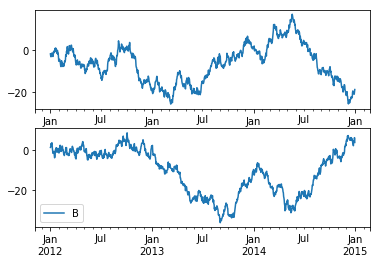

In [41]:
# демонстрируем построение подграфиков
# создаем макет, используя сетку 2x1,
# в каждой строке по одному подграфику
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
# отрисовываем первый подграфик на основе столбца 0 
# датафрейма walk_df в верхней строке сетки
walk_df[walk_df.columns[0]].plot(ax = ax5)
# отрисовываем второй подграфик на основе столбца 1 
# датафрейма walk_df в нижней строке сетки
walk_df[[walk_df.columns[1]]].plot(ax = ax6);